In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

In [2]:
df = pd.read_csv('water_final.csv')

In [3]:
df.columns

Index(['command_address', 'response_address', 'command_memory',
       'response_memory', 'command_memory_count', 'response_memory_count',
       'comm_read_function', 'comm_write_fun', 'resp_read_fun',
       'resp_write_fun', 'sub_function', 'command_length', 'resp_length', 'HH',
       'H', 'L', 'LL', 'control_mode', 'control_scheme', 'pump', 'crc_rate',
       'measurement', 'time', 'result'],
      dtype='object')

In [4]:
df.dtypes

command_address            int64
response_address           int64
command_memory             int64
response_memory            int64
command_memory_count       int64
response_memory_count      int64
comm_read_function         int64
comm_write_fun             int64
resp_read_fun              int64
resp_write_fun             int64
sub_function               int64
command_length             int64
resp_length                int64
HH                         int64
H                          int64
L                          int64
LL                         int64
control_mode               int64
control_scheme             int64
pump                       int64
crc_rate                   int64
measurement              float64
time                     float64
result                     int64
dtype: object

In [5]:
df.head()

,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,resp_write_fun,...,H,L,LL,control_mode,control_scheme,pump,crc_rate,measurement,time,result
0,7,7,183,233,9,10,3,10,3,10,...,80,20,10,2,1,0,1,14.894827,1.13,0
1,7,7,183,233,9,10,3,10,3,10,...,80,20,10,2,1,0,1,16.259237,1.25,0
2,7,7,183,233,9,10,3,10,3,10,...,80,20,10,2,1,0,1,17.254122,1.04,0
3,7,7,183,233,9,10,3,10,3,10,...,80,20,10,2,1,0,1,17.936329,1.07,0
4,7,7,183,233,9,10,3,10,3,10,...,80,20,10,2,1,0,1,18.703810,1.20,0


In [6]:
df.tail()

,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,resp_write_fun,...,H,L,LL,control_mode,control_scheme,pump,crc_rate,measurement,time,result
236174,7,7,183,233,10,10,3,10,3,10,...,80,20,10,2,1,0,0,89.198410,1.30,0
236175,7,7,183,233,10,10,3,10,3,10,...,80,20,10,2,1,0,0,89.567932,1.20,0
236176,7,7,183,233,10,10,3,10,3,10,...,80,20,10,2,1,0,0,88.317230,1.05,0
236177,7,7,183,233,10,10,3,10,3,10,...,80,20,10,2,1,0,0,88.374077,1.07,0
236178,7,7,183,233,10,10,3,10,3,10,...,80,20,10,2,1,0,0,88.459358,1.05,0


In [7]:
df.shape

(236179, 24)

In [8]:
df.isnull().sum()

command_address          0
response_address         0
command_memory           0
response_memory          0
command_memory_count     0
response_memory_count    0
comm_read_function       0
comm_write_fun           0
resp_read_fun            0
resp_write_fun           0
sub_function             0
command_length           0
resp_length              0
HH                       0
H                        0
L                        0
LL                       0
control_mode             0
control_scheme           0
pump                     0
crc_rate                 0
measurement              0
time                     0
result                   0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(236179, 24)

In [11]:
X = df.drop(['result'],axis=1)
y = df['result']

In [12]:
import imblearn
# import library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=60, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 172415, 7: 34002, 2: 12460, 1: 9187, 4: 3725, 3: 1833, 5: 1320, 6: 1237})
Resample dataset shape Counter({0: 1237, 1: 1237, 2: 1237, 3: 1237, 4: 1237, 5: 1237, 6: 1237, 7: 1237})


In [13]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_rus,y_rus,test_size=0.3,random_state=1)

In [15]:
X_train.shape

(6927, 23)

In [16]:
y_train.shape

(6927,)

In [17]:
X_test.shape

(2969, 23)

In [18]:
y_test.shape

(2969,)

**RANDOM FOREST**

In [19]:
#import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

Accuracy:  0.9727180868979455
Precision: 0.9727
Recall: 0.9728
F1 Score: 0.9726


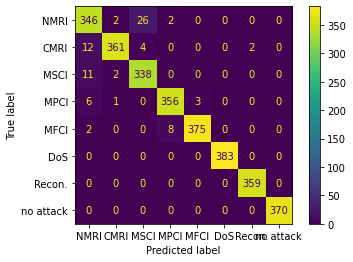

In [24]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))	
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))	
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()

In [25]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.918     0.920     0.919       376
           1      0.986     0.953     0.969       379
           2      0.918     0.963     0.940       351
           3      0.973     0.973     0.973       366
           4      0.992     0.974     0.983       385
           5      1.000     1.000     1.000       383
           6      0.994     1.000     0.997       359
           7      1.000     1.000     1.000       370

    accuracy                          0.973      2969
   macro avg      0.973     0.973     0.973      2969
weighted avg      0.973     0.973     0.973      2969



In [23]:


from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
from statistics import mean
print(mean(TPR))
print(mean(TNR))

from sklearn.metrics import roc_auc_score
y_score = clf.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

0.9727982368601085
0.9961107636828137


0.9931601716093258

XGBOOST


In [27]:
from xgboost import XGBClassifier


In [28]:
model = XGBClassifier(use_label_enocer=False, eval_metrics='mlogloss')

In [29]:
model.fit(X_train,y_train)


XGBClassifier(eval_metrics='mlogloss', objective='multi:softprob',
              use_label_enocer=False)

In [30]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

XGBClassifier(eval_metric='mlogloss', gpu_id=-1, interaction_constraints='',
              learning_rate=0.300000012, max_depth=6, monotone_constraints='()',
              n_jobs=16, num_parallel_tree=1, objective='multi:softprob',
              scale_pos_weight=None, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9757494105759515

In [33]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9757494105759515

Accuracy:  0.9757494105759515


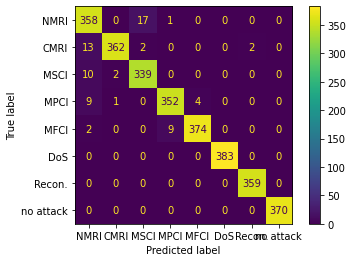

In [34]:

#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()


Accuracy:  0.9757494105759515
Precision: 0.9760
Recall: 0.9758
F1 Score: 0.9758


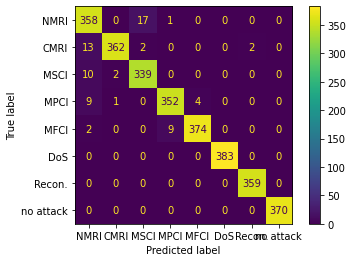

0.975782743678537
0.9965395041192471


0.9970093328825284

In [36]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))	
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))	
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()

from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
from statistics import mean
print(mean(TPR))
print(mean(TNR))

from sklearn.metrics import roc_auc_score
y_score = model.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.913     0.952     0.932       376
           1      0.992     0.955     0.973       379
           2      0.947     0.966     0.956       351
           3      0.972     0.962     0.967       366
           4      0.989     0.971     0.980       385
           5      1.000     1.000     1.000       383
           6      0.994     1.000     0.997       359
           7      1.000     1.000     1.000       370

    accuracy                          0.976      2969
   macro avg      0.976     0.976     0.976      2969
weighted avg      0.976     0.976     0.976      2969



In [ ]:


from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
from statistics import mean
print(mean(TPR))
print(mean(TNR))

from sklearn.metrics import roc_auc_score
y_score = model.predict_proba(x_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

**BAGGING**

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)

In [39]:
y_test_pred=bag_model.predict(X_test)

Accuracy:  0.9737285281239475
Precision: 0.9760
Recall: 0.9758
F1 Score: 0.9758


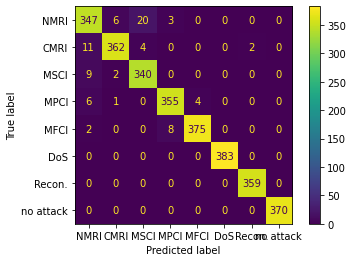

In [40]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_test_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_test_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))	
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))	
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()

Accuracy:  0.9757494105759515
Precision: 0.9760
Recall: 0.9758
F1 Score: 0.9758


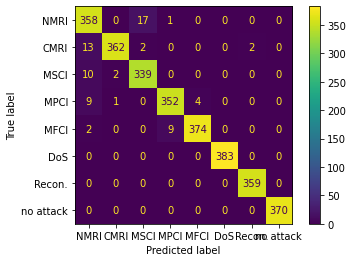

0.975782743678537
0.9965395041192471


0.9924258277120336

In [42]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))	
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))	
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()

from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
from statistics import mean
print(mean(TPR))
print(mean(TNR))

from sklearn.metrics import roc_auc_score
y_score = bag_model.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

In [ ]:


from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
from statistics import mean
print(mean(TPR))
print(mean(TNR))

from sklearn.metrics import roc_auc_score
y_score = model.predict_proba(x_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

**C5.0** **TREE**

In [43]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


In [49]:
model_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, max_leaf_nodes=7) 
model_1.fit(X_train,y_train)
y_pred = model_1.predict(X_test)

Accuracy:  0.6143482654092287


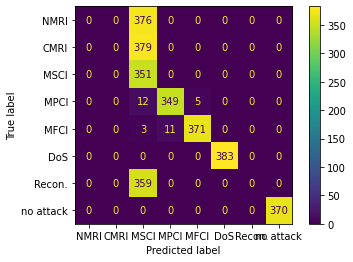

In [51]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()

Accuracy:  0.6143482654092287
Precision: 0.5242
Recall: 0.6146
F1 Score: 0.5400


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


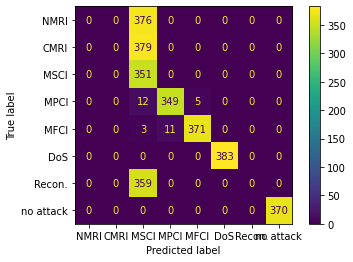

0.6146485345255837
0.9453242371146062


0.8888671340369233

In [53]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))	
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))	
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()

from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
from statistics import mean
print(mean(TPR))
print(mean(TNR))

from sklearn.metrics import roc_auc_score
y_score = model_1.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

In [ ]:


from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
from statistics import mean
print(mean(TPR))
print(mean(TNR))

from sklearn.metrics import roc_auc_score
y_score = model.predict_proba(x_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

**LDA**

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [55]:
y_pred = model_LDA.predict(X_test)

Accuracy:  0.6069383630852139
Precision: 0.6305
Recall: 0.6130
F1 Score: 0.5613


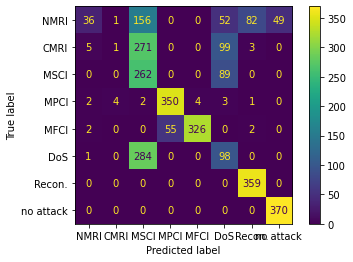

In [56]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))	
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))	
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()

In [57]:


from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
from statistics import mean
print(mean(TPR))
print(mean(TNR))

from sklearn.metrics import roc_auc_score
y_score = model_LDA.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

0.6129667528881506
0.9440816010265789


0.8883240342910874